# Figures for paper

Sam Maurer, Nov 2018

Launch the mongodb server first:  
`mongod --dbpath ~/mongodb-data`

https://api.mongodb.com/python/current/api/pymongo/index.html  
https://docs.mongodb.com/manual/reference/operator/aggregation-pipeline/

In [1]:
import numpy as np
import pandas as pd
import pymongo

import datetime
import os

In [2]:
%matplotlib inline

In [3]:
print(np.__version__)
print(pd.__version__)
print(pymongo.__version__)

1.15.4
0.23.4
3.7.1


### Mongodb connection

In [6]:
client = pymongo.MongoClient()
print(client.server_info()['version'])

4.0.3


In [7]:
db = client.tweets
col = db.westcoastmonthly
r1 = db.westcoast_monthly_random_10k
r2 = db.westcoast_monthly_random_1M

In [8]:
print(col.estimated_document_count())

18000000


### Figure: rate of posts by month

In [11]:
%%time
c = list(r2.aggregate([
    {"$addFields": {"_dt": {"$toDate": {"$toLong": "$timestamp_ms"}}}}, 
    {"$group": {"_id": {"y": {"$year": "$_dt"}, "m": {"$month": "$_dt"}}, 
                "maxTimestamp": {"$max": "$_dt"},
                "minTimestamp": {"$min": "$_dt"}}},
    {"$addFields": {"value": {"$divide": [500000, 
                        {"$subtract": ["$maxTimestamp", "$minTimestamp"]}]}}}]))

CPU times: user 2.21 ms, sys: 1.53 ms, total: 3.74 ms
Wall time: 4.04 s


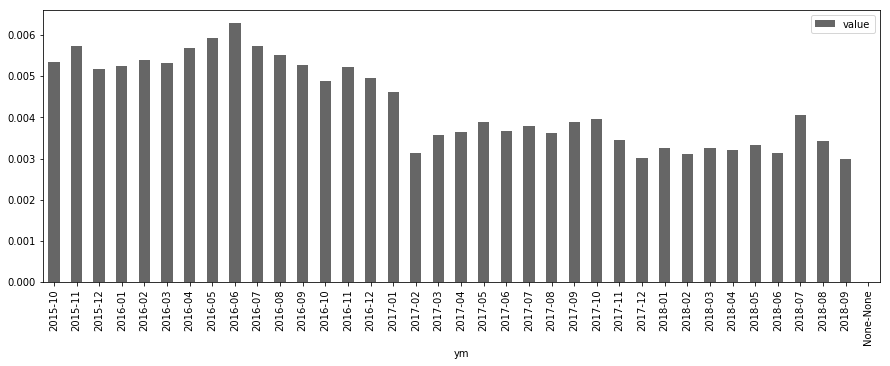

In [12]:
ym, value = ([], [])

for doc in c:
    ym.append(str(doc['_id']['y']) + '-' + str(doc['_id']['m']).zfill(2))
    value.append(doc['value'])

df = pd.DataFrame({'ym': ym, 'value': value}).sort_values('ym')
df.plot.bar(x='ym', y='value', figsize=(15,5), facecolor='666')